In [23]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [24]:
import yfinance as yf           # to get historical stock data
import pandas as pd             # for data handling
import matplotlib.pyplot as plt # for plotting
from statsmodels.tsa.arima.model import ARIMA  # forecasting model


In [25]:
# Download Apple stock data for 1 year
data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Keep only the 'Close' price for simplicity
data = data[['Close']]
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2023-01-03  123.632530
2023-01-04  124.907700
2023-01-05  123.583099
2023-01-06  128.130234
2023-01-09  128.654144


<function matplotlib.pyplot.show(close=None, block=None)>

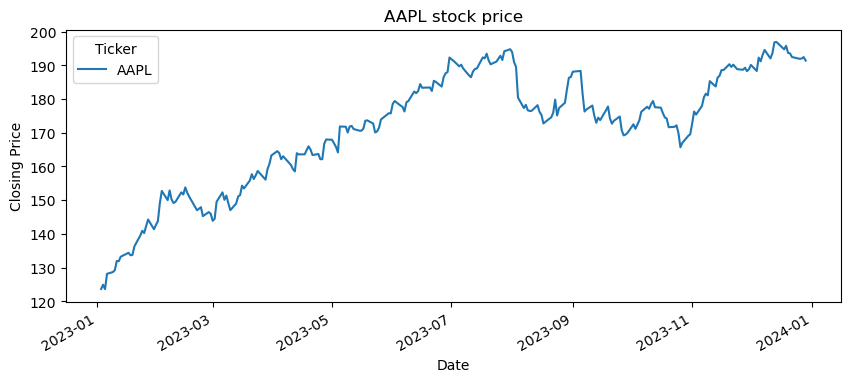

In [26]:
data["Close"].plot(figsize=(10,4),title="AAPL stock price")
plt.xlabel("Date")
plt.ylabel('Closing Price')
plt.show

In [27]:
train = data.iloc[:-30]  # all except last 30 days
test = data.iloc[-30:]   # last 30 days


In [28]:
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
preds = model_fit.forecast(steps=30)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


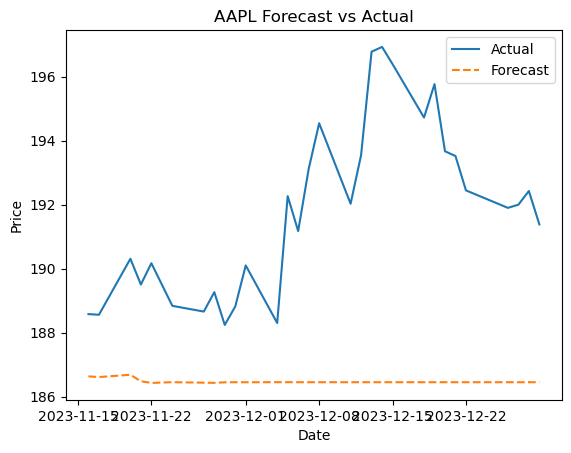

In [32]:
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, preds, label='Forecast', linestyle='--')
plt.title("AAPL Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
